In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from env import get_db_url

# Exercises
The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

**Hint**: You will need to explore the database (yay SQL!)

1. Label students by the program they are in.
1. Is it possible to identify the user_id of a staff member?
1. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.
1. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 
1. Plot the access activity of these students.

**BONUS:** Can you identify users who are viewing both the web dev and data science curriculum?

### Label students by the program they are in.


In [2]:
# reading csv from SQL query

df = pd.read_csv('curriculum_logs')
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [3]:
#Convert `date` column to datetime class
#Set `date` column as the index for the dataframe
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

In [4]:
# number of unique cohort Ids 
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades',
       'Hyperion', 'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Easley', 'Marco', 'Neptune', 'Florence', 'Oberon'], dtype=object)

In [5]:
# There are 4 programs 
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [6]:
# data science is probably group id 3/ accessed clustering and regression project
df[df['program_id'] == 3]


,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2019-08-20,2019-08-20,09:39:58,/,466,34,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3
2019-08-20,2019-08-20,09:39:59,/,467,34,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3
2019-08-20,2019-08-20,09:39:59,/,468,34,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3
2019-08-20,2019-08-20,09:40:02,/,469,34,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3
2019-08-20,2019-08-20,09:40:08,/,470,34,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:14:16,regression/project,841,133,99.162.244.233,133,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3
2021-04-21,2021-04-21,16:15:51,regression/project,841,133,99.162.244.233,133,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3
2021-04-21,2021-04-21,16:23:53,/,143,133,173.174.194.60,133,Easley,#easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,NaN,3


In [7]:
# web dev is probably group id 1/ accessing java 
df[df['program_id'] == 1]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,10:14:47,/,11,1,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10,2021-04-10,00:20:55,content/javascript/conditionals.html,51,13,72.179.168.148,13,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2021-04-10,2021-04-10,00:21:15,content/javascript/loops.html,51,13,72.179.168.148,13,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2021-04-10,2021-04-10,00:28:10,content/javascript/javascript-with-html.html,80,14,136.50.29.193,14,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,NaN,1


In [8]:
# cloud admin is probably group id 4/ html and css
df[df['program_id'] == 4]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-03-22,2018-03-22,19:01:49,/,152,9,207.68.209.17,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4
2018-03-22,2018-03-22,19:01:54,content/html-css,152,9,207.68.209.17,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4
2018-03-22,2018-03-22,19:01:54,content/html-css/gitbook/images/favicon.ico,152,9,207.68.209.17,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4
2018-03-22,2018-03-22,19:02:47,content/html-css,152,9,207.68.209.17,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4
2018-03-22,2018-03-22,19:02:52,content/html-css/introduction.html,152,9,207.68.209.17,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,4


In [9]:
# Staff is probably group id 2
df[df['name'] == 'staff']

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,


### Is it possible to identify the user_id of a staff member?


In [10]:
# list of staff access times to curriculum
df[df['name'] == 'Staff']

# program id number = 2
# id number = 2 

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-12-06,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28,97.105.19.58,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2018-12-06,2018-12-06,14:25:40,javascript-i,314,28,97.105.19.58,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2018-12-06,2018-12-06,14:25:41,javascript-i/coffee-project,314,28,97.105.19.58,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2018-12-06,2018-12-06,15:31:29,spring,40,28,170.248.173.247,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2018-12-06,2018-12-06,15:31:33,spring/fundamentals/security,40,28,170.248.173.247,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,jquery/personal-site,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2021-04-21,2021-04-21,16:42:02,jquery/mapbox-api,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2021-04-21,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


### Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.

In [11]:
# list of staff access times to curriculum
df[df['end_date'] < df.date]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2018-01-26,2018-01-26,10:14:47,/,11,1,97.105.19.61,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,jquery/personal-site,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2021-04-21,2021-04-21,16:42:02,jquery/mapbox-api,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
2021-04-21,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


### Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 

In [12]:
time = df['time'].resample('H').count()
time

date
2018-01-26 00:00:00     533
2018-01-26 01:00:00       0
2018-01-26 02:00:00       0
2018-01-26 03:00:00       0
2018-01-26 04:00:00       0
                       ... 
2021-04-20 20:00:00       0
2021-04-20 21:00:00       0
2021-04-20 22:00:00       0
2021-04-20 23:00:00       0
2021-04-21 00:00:00    1107
Freq: H, Name: time, Length: 28345, dtype: int64

<AxesSubplot:xlabel='date'>

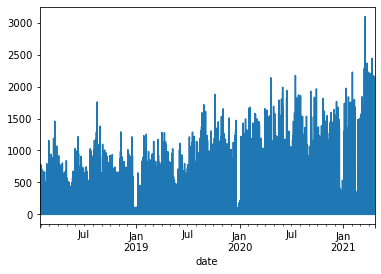

In [13]:
time.plot()

In [14]:
# 30 day EMA
ema_30d = time.ewm(span=30).mean()
ema_30d.head()

date
2018-01-26 00:00:00    533.000000
2018-01-26 01:00:00    257.616667
2018-01-26 02:00:00    165.958164
2018-01-26 03:00:00    120.230642
2018-01-26 04:00:00     92.875260
Freq: H, Name: time, dtype: float64

In [15]:
# 90 day EMA
ema_90d = time.ewm(span=90).mean()
ema_90d.head()

date
2018-01-26 00:00:00    533.000000
2018-01-26 01:00:00    263.538889
2018-01-26 02:00:00    173.733303
2018-01-26 03:00:00    128.841596
2018-01-26 04:00:00    101.915437
Freq: H, Name: time, dtype: float64

In [16]:
# set the window span (number of periods, span in this example = 30)
span = 30

# compute midband
midband = time.ewm(span=span).mean()

midband.head()

date
2018-01-26 00:00:00    533.000000
2018-01-26 01:00:00    257.616667
2018-01-26 02:00:00    165.958164
2018-01-26 03:00:00    120.230642
2018-01-26 04:00:00     92.875260
Freq: H, Name: time, dtype: float64

In [17]:
# compute exponential stdev
stdev = time.ewm(span=span).std()

stdev.head()

date
2018-01-26 00:00:00           NaN
2018-01-26 01:00:00    376.887914
2018-01-26 02:00:00    302.499418
2018-01-26 03:00:00    257.473665
2018-01-26 04:00:00    226.295154
Freq: H, Name: time, dtype: float64

In [18]:
# compute upper and lower bands/ lower band may need to just be set to zero because can't have negative page views
ub = midband + stdev*2
lb = midband - stdev*2
ub, lb

(date
 2018-01-26 00:00:00            NaN
 2018-01-26 01:00:00    1011.392495
 2018-01-26 02:00:00     770.956999
 2018-01-26 03:00:00     635.177973
 2018-01-26 04:00:00     545.465568
                           ...     
 2021-04-20 20:00:00     606.616027
 2021-04-20 21:00:00     585.809411
 2021-04-20 22:00:00     565.732249
 2021-04-20 23:00:00     546.358721
 2021-04-21 00:00:00     833.434559
 Freq: H, Name: time, Length: 28345, dtype: float64,
 date
 2018-01-26 00:00:00           NaN
 2018-01-26 01:00:00   -496.159162
 2018-01-26 02:00:00   -439.040672
 2018-01-26 03:00:00   -394.716689
 2018-01-26 04:00:00   -359.715048
                           ...    
 2021-04-20 20:00:00   -525.394528
 2021-04-20 21:00:00   -509.828008
 2021-04-20 22:00:00   -494.652873
 2021-04-20 23:00:00   -479.865111
 2021-04-21 00:00:00   -628.392150
 Freq: H, Name: time, Length: 28345, dtype: float64)

In [19]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26 00:00:00,NaN,NaN
2018-01-26 01:00:00,1011.392495,-496.159162
2018-01-26 02:00:00,770.956999,-439.040672
2018-01-26 03:00:00,635.177973,-394.716689
2018-01-26 04:00:00,545.465568,-359.715048


In [20]:
my_df = pd.concat([time, midband, bb], axis=1)
my_df.columns = ['time', 'midband', 'ub', 'lb']
my_df.head()

,time,midband,ub,lb
date,,,,
2018-01-26 00:00:00,533,533.000000,NaN,NaN
2018-01-26 01:00:00,0,257.616667,1011.392495,-496.159162
2018-01-26 02:00:00,0,165.958164,770.956999,-439.040672
2018-01-26 03:00:00,0,120.230642,635.177973,-394.716689
2018-01-26 04:00:00,0,92.875260,545.465568,-359.715048


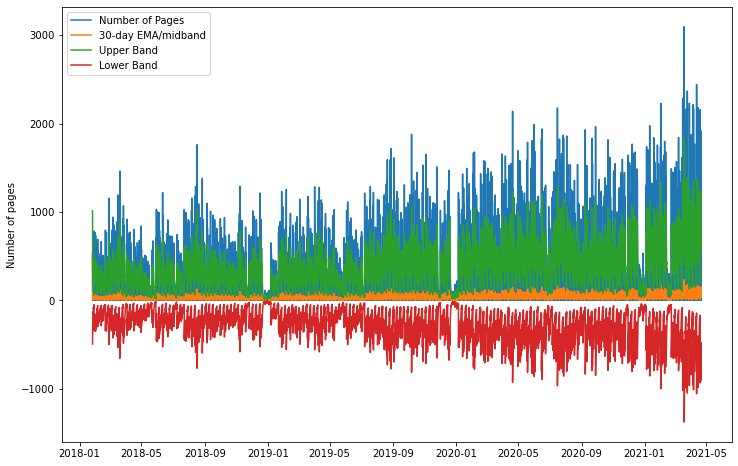

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.time, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

# midband is what you would expect 

### Plot the access activity of these students.

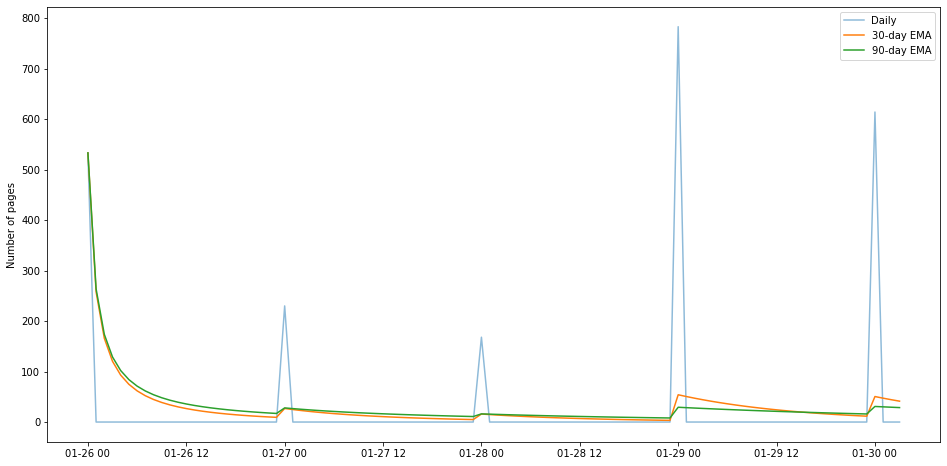

In [22]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(time.index[:100], time[:100], label='Daily', alpha=.5)
ax.plot(time.index[:100], ema_30d[:100], label = '30-day EMA')
ax.plot(time.index[:100], ema_90d[:100], label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()